In [ ]:
!pip install qiskit-ibm-runtime
!pip install rustworkx
!pip install 'qiskit[visualization]'
!pip install qiskit_ibm_provider


In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
#from qiskit_ibm_provider import IBMProvider

QiskitRuntimeService.save_account(channel="ibm_quantum", token="cf189a496e9f460092bff6506ac896178edfc61918e9f62fc944001e9b5ebb51f118e4fdefba1a89d5a3b9ae3d1504571d2d9ff630747c52965ea6a5ed6a912a", overwrite=True, set_as_default=True)
service = QiskitRuntimeService(channel='ibm_quantum')

#provider = IBMProvider()

# Select a real quantum device
##backend = provider.get_backend('ibm_brisbane')  # Use any available backend
#backend = provider.get_backend('ibm_brisbane')  # Use any available backend
backend = service.least_busy(min_num_qubits=10)
print(backend)


<IBMBackend('ibm_kyiv')>


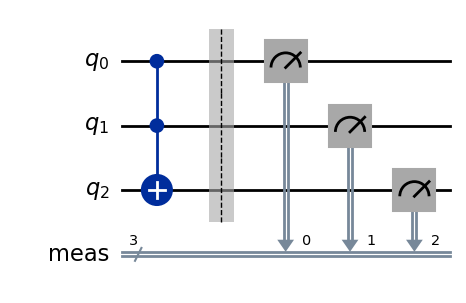


Transpilation successful!


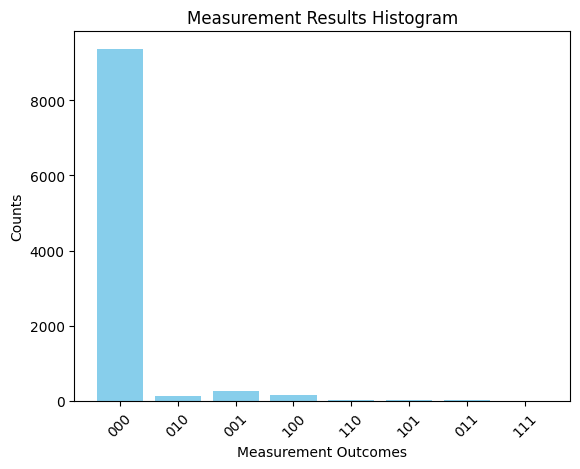

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit import QuantumCircuit, transpile
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService, Options, Session
from qiskit_ibm_runtime import SamplerV2 as Sampler


# useful additional packages
# import math tools
import numpy as np
# We import the tools to handle general Graphs
import networkx as nx
# import plotting tools
import matplotlib.pyplot as plt
from matplotlib import cm
from pylatexenc import *


# prepare the quantum and classical resisters
qc = QuantumCircuit(3)

a = 0
b = 1
t = 2  # target qubit
qc.ccx(a,b,t)
#qc.barrier()
#qc.measure([1,0,0],[0,1,0],[0,0,1])
qc.measure_all()

display(qc.draw(output='mpl'))

# Transpile with explicit basis gates and coupling map
try:
    transpiled_qc = transpile(
        qc,
        backend=backend,
        #basis_gates=backend_config.basis_gates,  # Use backend's basis gates
        #coupling_map=backend_config.coupling_map,  # Use backend's coupling map
        optimization_level=2,  # Set optimization level (0-3)
        translation_method='synthesis' # Explicitly set the translation method to 'synthesis' or 'unroller'
    )
    print("\nTranspilation successful!")
except Exception as e:
    print(f"Error during transpilation: {e}")
    raise

# If using qiskit-ibm-runtime<0.24.0, change `mode=` to `backend=`
sampler = Sampler(mode=backend)
sampler.options.default_shots = 1000

# Set simple error suppression/mitigation options
sampler.options.dynamical_decoupling.enable = True
sampler.options.dynamical_decoupling.sequence_type = "XY4"
sampler.options.twirling.enable_gates = True
sampler.options.twirling.num_randomizations = "auto"

pub= (transpiled_qc, )
job = sampler.run([pub], shots=int(1e4))
result=job.result()
# Accessing the data from the first public result
sampler_result = result._pub_results[0]

# Access the BitArray object inside the DataBin
bit_array = sampler_result.data.meas.get_counts()
bitstrings = list(bit_array.keys())
counts = list(bit_array.values())

# Plot the histogram
plt.bar(bitstrings, counts, color='skyblue')

# Labeling the plot
plt.xlabel('Measurement Outcomes')
plt.ylabel('Counts')
plt.title('Measurement Results Histogram')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()





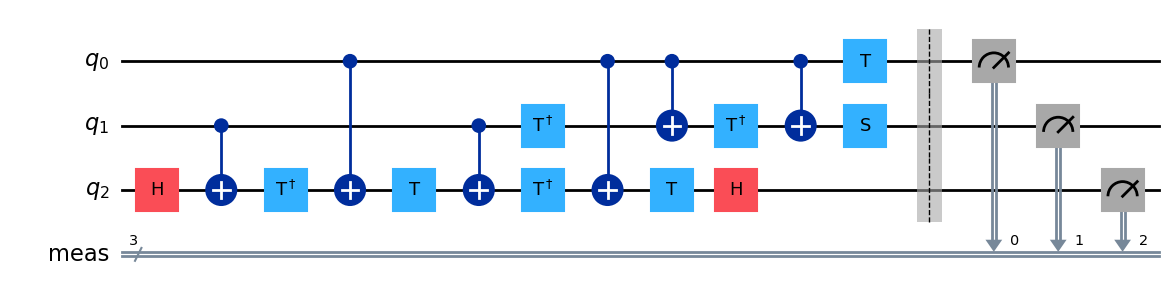


Transpilation successful!


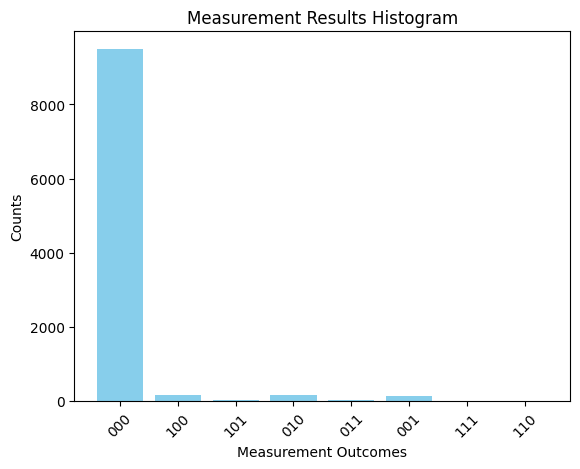

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit import QuantumCircuit, transpile
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService, Options, Session
from qiskit_ibm_runtime import SamplerV2 as Sampler


# useful additional packages
# import math tools
import numpy as np
# We import the tools to handle general Graphs
import networkx as nx
# import plotting tools
import matplotlib.pyplot as plt
from matplotlib import cm
from pylatexenc import *


# prepare the quantum and classical resisters
qc = QuantumCircuit(3)
qc.h(2)
qc.cx(1,2)
qc.tdg(2) # Apply Tdg-gate to qubit 0
qc.cx(0,2)
qc.t(2)
qc.cx(1,2)
qc.tdg(1)
qc.tdg(2)
qc.cx(0,2)
qc.t(2)
qc.cx(0,1)
qc.tdg(1)
qc.h(2)
qc.cx(0,1)
qc.t(0)
qc.s(1)
qc.measure_all()

display(qc.draw(output='mpl'))

# Transpile with explicit basis gates and coupling map
try:
    transpiled_qc = transpile(
        qc,
        backend=backend,
        #basis_gates=backend_config.basis_gates,  # Use backend's basis gates
        #coupling_map=backend_config.coupling_map,  # Use backend's coupling map
        optimization_level=2,  # Set optimization level (0-3)
        translation_method='synthesis' # Explicitly set the translation method to 'synthesis' or 'unroller'
    )
    print("\nTranspilation successful!")
except Exception as e:
    print(f"Error during transpilation: {e}")
    raise

# If using qiskit-ibm-runtime<0.24.0, change `mode=` to `backend=`
sampler = Sampler(mode=backend)
sampler.options.default_shots = 1000

# Set simple error suppression/mitigation options
sampler.options.dynamical_decoupling.enable = True
sampler.options.dynamical_decoupling.sequence_type = "XY4"
sampler.options.twirling.enable_gates = True
sampler.options.twirling.num_randomizations = "auto"

pub= (transpiled_qc, )
job = sampler.run([pub], shots=int(1e4))
result=job.result()
# Accessing the data from the first public result
sampler_result = result._pub_results[0]

# Access the BitArray object inside the DataBin
bit_array = sampler_result.data.meas.get_counts()
bitstrings = list(bit_array.keys())
counts = list(bit_array.values())

# Plot the histogram
plt.bar(bitstrings, counts, color='skyblue')

# Labeling the plot
plt.xlabel('Measurement Outcomes')
plt.ylabel('Counts')
plt.title('Measurement Results Histogram')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()





The above two circuits are implemented from the assignement 5. The measurement outcomes of the two circuits are same, indicating that the second circuit is an equivalent of the Toffoli gate (first circuit).